# GRADUATE ADMISSION PREDICTION

# Submitted by:
    PRASANTH REDDY : pthum2@unh.newhaven.edu
    SUMA MODUGU    : smodu1@unh.newhaven.edu
    MOHAMMAD NAZEER: mshai14@unh.newhaven.edu

# 1.Importing Modules

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import plotly.express as px
import os


# 2.Loading the data

In [11]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
df = df.drop(['Serial No.'], axis=1)
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df=df.rename(columns = {'LOR ':'LOR'})
df.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
147,326,114,3,3.0,3.0,9.11,1,0.83
269,308,108,4,4.5,5.0,8.34,0,0.77
45,322,110,5,5.0,4.0,9.10,1,0.88
363,306,103,2,2.5,3.0,8.36,0,0.69
362,338,115,5,4.5,5.0,9.23,1,0.91


# 3.Information about the data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# 4.Summary of Data

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


# 4.Getting the Correlated Features

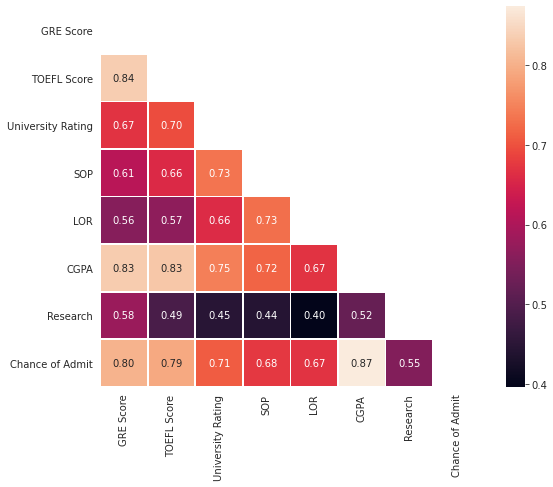

In [15]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr,mask=mask,square=True,annot=True,fmt='0.2f',linewidths=.8,color = 'orange')


### Let's plot the pairwise relationship between important attributes.

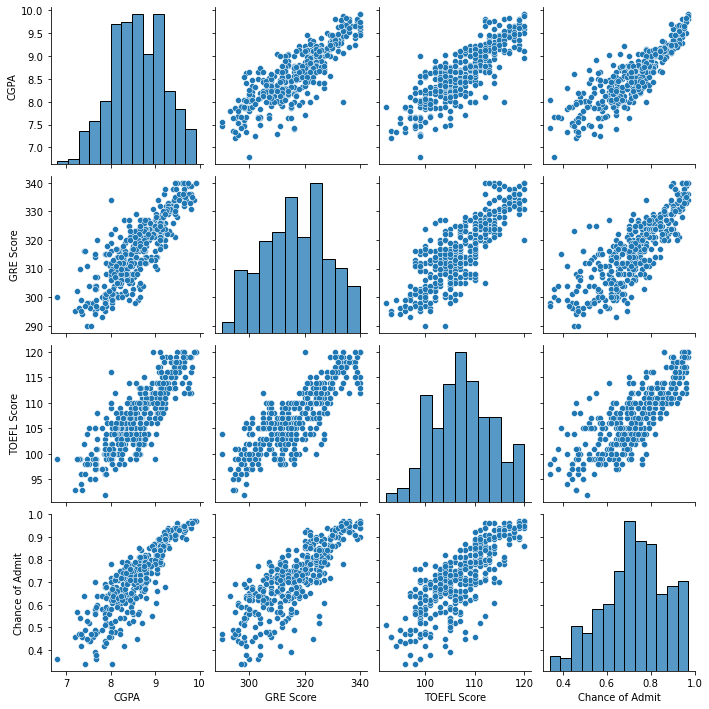

In [16]:
df1 = df[['CGPA','GRE Score','TOEFL Score','Chance of Admit']]
sns.pairplot(df1)

##  Does the Student from top universities are doing research papers?

In [17]:
px.strip(df, x="CGPA", y="Research", orientation="h", color="University Rating")

### Conclusion: <b>Mostly the students from top univerties with ratings more than 3 are releasing research papers and also they are scoring good CGPA(>8)</b>

##  Does research paper really having a good impact in admission?

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



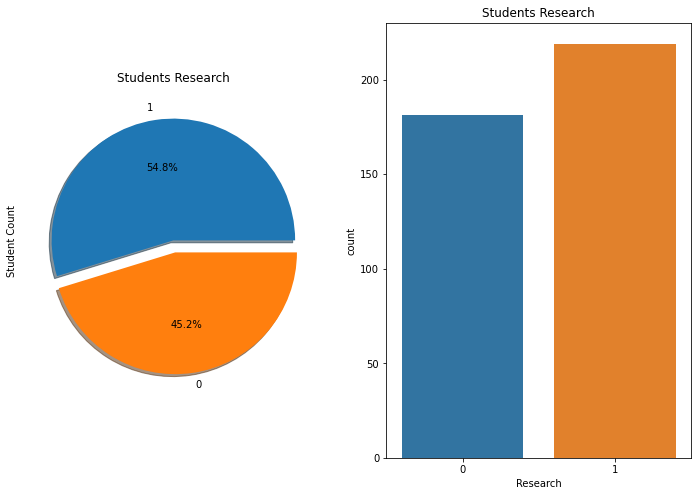

In [18]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Research'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Students Research')
ax[0].set_ylabel('Student Count')
sns.countplot('Research',data=df,ax=ax[1])
ax[1].set_title('Students Research')
plt.show()

#### **Conclusion** : We can see that 55% Students have done Research.It possible only the better student could get a chance for doing research. Doing research does add practical knowledge and increases the student skill of working with groups or teams.

## Does the student who is academically good, doing well in GRE and TOEFL?

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\prasa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

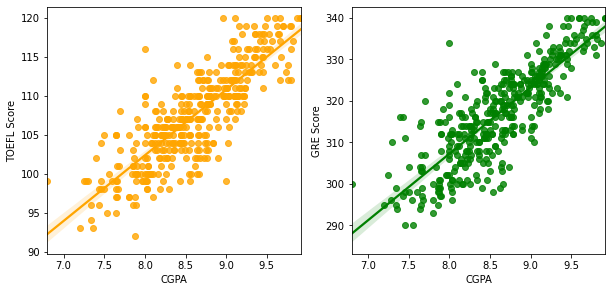

In [19]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.regplot(df['CGPA'],df['TOEFL Score'],color ='orange')
plt.subplot(2,2,2)
sns.regplot(df['CGPA'],df['GRE Score'],color ='green')

### Conclusion: <b>Yes it is!!!<br/>
### The Academic toppers are the top scorers in both TOEFL and GRE</b>

##  Who are the toppers in GRE, the students from top universities or normal universities?


In [20]:
px.scatter(df, x="TOEFL Score", y="GRE Score", color="University Rating", marginal_y="violin",
           marginal_x="box")

### Conclusion:<b> Yes it is!!!<br/>
### The top scorers in GRE and TOEFL are mostly from the University with Ratings more than 4.

## Do GRE & TOEFL scores influence the chance of getting admitted?

In [21]:
cor=df.corr()['Chance of Admit']
cor1 = cor.head(2)
import plotly.graph_objects as go


layout = dict(title = 'Influence on Chance of getting admitted',
              xaxis = dict(title = 'Exams'),
              yaxis = dict(title = 'Coorelation Value (Out of 1)'),
              width = 500,
              height = 500
              )
fig = go.Figure(data=[go.Scatter(
    x=['GRE Score', 'TOEFL Score'],
    y=[cor1[0],cor1[1]],
    mode='markers',
    marker=dict(
        color=[cor1[0]* 100,cor1[1]*100],
        size=[cor1[0]* 75,cor1[1]*75],
        showscale=True
        )
)],layout=layout)

fig.show()

### **Conclusion :** Here we can see that the chance of admit is highly correlated with GRE and TOEFEL scores.

 Comparative analysis of academic performance of students with research paper and without research paper

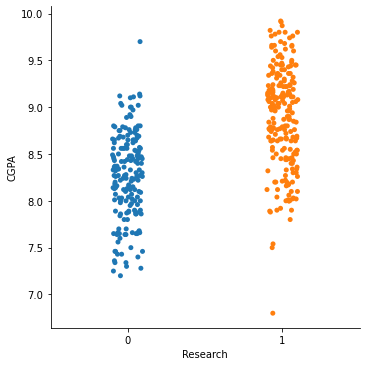

In [22]:
sns.catplot(x= 'Research',y = 'CGPA',data =df)

### <b> Conclusion:The students with research papers have scored high CGPA which tells that active learning helps the student.</b>

<AxesSubplot:xlabel='University Rating', ylabel='SOP'>

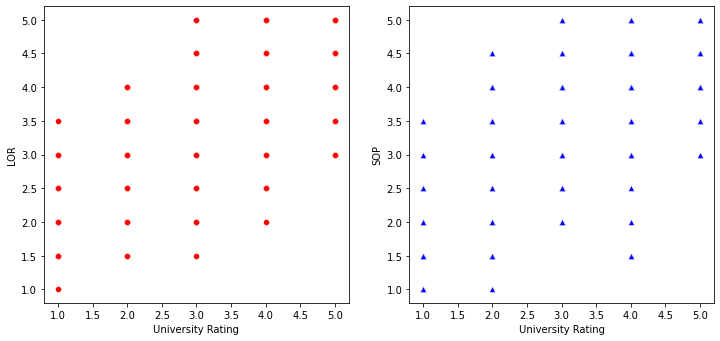

In [23]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
sns.scatterplot(x='University Rating',y='LOR',data=df,color='Red')
plt.subplot(2,2,2)
sns.scatterplot(x='University Rating',y='SOP',data=df,color='Blue', marker="^")

<AxesSubplot:xlabel='SOP', ylabel='LOR'>

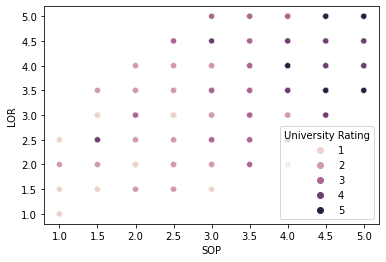

In [24]:
sns.scatterplot(data=df,x='SOP',y='LOR',hue='University Rating')

## Performing Standard Scaling

In [25]:
X = df[['GRE Score','TOEFL Score','University Rating','CGPA','Research']]
y = df['Chance of Admit']

In [26]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
X_ss = ss.fit_transform(X)

## Spliting into training and testing set

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

## Predictive Modelling

In [28]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR 
from sklearn.linear_model import Ridge as RR

In [29]:
models={'Linear Regression':LR(),'Decision Tree Regression':DTR(),'Random Forest Regression':RFR(),'Gradient Boosting Regression':GBR(),'Ada Boosting Regression':ABR(),'K-Neighbors Regression':KNR(),'Support Vector Regression':SVR(),'Ridge Regression':RR()}
pred =[]
print(models.keys())

dict_keys(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Ada Boosting Regression', 'K-Neighbors Regression', 'Support Vector Regression', 'Ridge Regression'])


In [30]:
from sklearn.metrics import r2_score
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc=r2_score(y_test, predictions)
    pred.append(acc)
    print(name,acc)

Linear Regression 0.7184020445559827
Decision Tree Regression 0.33390612865189284
Random Forest Regression 0.6044303602160112
Gradient Boosting Regression 0.6426203794231128
Ada Boosting Regression 0.6529997751885809
K-Neighbors Regression 0.5515807344680874
Support Vector Regression 0.6033980030505777
Ridge Regression 0.7194656476541403


<AxesSubplot:>

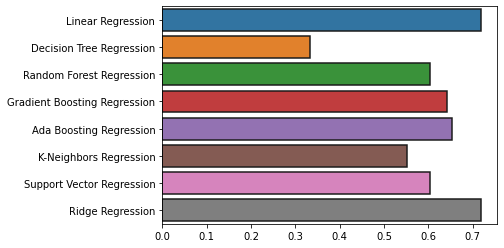

In [31]:
sns.barplot(y=list(models.keys()),x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

### Conclusion 

The data modeling starts with dividing the data into training and testing data. Here, we take the test_size = 0.2 which gives 20% data to train the model and remaining 80% of data is used for testing the data. Fitting this trained model to the testing data with different modeling techniques gives different predictive analysis based on the internal structure of each algorithm. So, to conclude we can see with the use Linear regression the outcome is 76% predictive. 